# SBA Loan Approval Analysis & Prediction

In this project, I have analysed and predicted loan approval status based on various parameters for the Small Business Administration (SBA). We use various python libraries to preprocess the dataset, and the dataset was imported from kaggle.
The initial pre-processing of the dataset was inspired from Kevin Miller. Further model training was performed into predicting the best result for the loan approval.

## Importing the Required Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

   LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate  ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120   1997-02-28      1997.0   
1                1ST SOURCE BANK        IN  722410   1997-02-28      1997.0   
2        GRANT COUNTY STATE BANK        IN  621210   1997-02-28      1997.0   
3  1ST NATL BK & TR CO OF BROKEN        OK     NaN   1997-02-28      1997.0   
4        FLORIDA BUS. DEVEL CORP        FL     NaN   1997-02-28      1997.0   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate 

## Importing the Dataset

In [ ]:
df = pd.read_csv('sample_data/SBAnational.csv')

In [ ]:
df_copy = df.copy()

## Data Pre-Processing

Understanding the dataset and it's features and pre-processing it according to the required dataframe for model training purposes.

In [ ]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120.0,2/28/1997,1997,...,N,Y,NaN,2/28/1999,60000.0,0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410.0,2/28/1997,1997,...,N,Y,NaN,5/31/1997,40000.0,0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210.0,2/28/1997,1997,...,N,N,NaN,12/31/1997,287000.0,0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,NaN,2/28/1997,1997,...,N,Y,NaN,6/30/1997,35000.0,0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,NaN,2/28/1997,1997,...,N,N,NaN,5/14/1997,229000.0,0,P I F,0.0,229000.0,229000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              697216 non-null  float64
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df.shape

(899164, 27)

Here, we notice that there are 27 different columns, and there are 899164 entries in the dataframe.

In [ ]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.991640e+05,899164.000000,697216.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05
mean,4.772612e+09,53804.391241,514132.743048,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05
std,2.538175e+09,31184.159152,173354.878168,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05
min,1.000014e+09,0.000000,111110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,2.589758e+09,27587.000000,423430.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,4.361439e+09,55410.000000,512110.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,6.904627e+09,83704.000000,621399.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


In [ ]:
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,201948
ApprovalDate,0
ApprovalFY,0


Here, we notice that there are significant number of null values in the dataframe, specifically the most in ChgOffDate column.

In [ ]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [ ]:
df.isnull().sum()

,0
LoanNr_ChkDgt,0
Name,0
City,0
State,0
Zip,0
Bank,0
BankState,0
NAICS,198267
ApprovalDate,0
ApprovalFY,0


In [ ]:
df.dtypes

,0
LoanNr_ChkDgt,int64
Name,object
City,object
State,object
Zip,int64
Bank,object
BankState,object
NAICS,float64
ApprovalDate,object
ApprovalFY,object


Here, we notice that several columns which need to have a specific dtype has object, which we will need to correct by setting them with their appropriate dtype.

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0,0.0,60000.0,48000.0
1,40000.0,0,0.0,40000.0,32000.0
2,287000.0,0,0.0,287000.0,215250.0
3,35000.0,0,0.0,35000.0,28000.0
4,229000.0,0,0.0,229000.0,229000.0


Here, we notice that the issue is because of the dollar symbol, because of which converts the int dtype column to object.

So we remove the symbol and convert the dtype of these columns.

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
    df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(
        lambda x: x.strip().replace('$', '').replace(',', '') if isinstance(x, str) else x
    )


Here, in case of ApprovalFY, we have two dtypes: str and int

We need to convert into int dtype, so we need to check which unique values in the column has str dtype.

In [ ]:
df['ApprovalFY'].apply(type).value_counts()

,count
ApprovalFY,
<class 'int'>,759570
<class 'str'>,126670


In [ ]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

So, we notice that there are some rows which have the character 'A' along with the year.

In [ ]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df.ApprovalFY = df.ApprovalFY.apply(clean_str).astype('int64')

In [ ]:
df['ApprovalFY'].apply(type).value_counts()

,count
ApprovalFY,
<class 'int'>,886240


Further converting the columns to their appropriate dtypes.

In [ ]:
df = df.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [ ]:
df.dtypes

,0
LoanNr_ChkDgt,int64
Name,object
City,object
State,object
Zip,object
Bank,object
BankState,object
NAICS,float64
ApprovalDate,object
ApprovalFY,int64


In [ ]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

Here, according the file that was provided along with the dataset, we map the industry code with the industry name.

In [ ]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [ ]:
df.dropna(subset = ['Industry'], inplace = True)

Now, we convert the FranchiseCode column to a binary column, based on if whether it is or it isn't a franchise, referring the file along with the dataset.

In [ ]:
df.FranchiseCode.unique()

array([    1, 15100, 10656, ..., 16452, 35618, 18701])

In [ ]:
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [ ]:
df.FranchiseCode

,FranchiseCode
0,1
1,1
2,1
5,1
7,1
...,...
899156,1
899157,1
899159,1
899160,1


Convert the NewExist column into a binary column.

In [ ]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

In [ ]:
df.NewExist.unique()

array([2, 1])

In [ ]:
df.RevLineCr.unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [ ]:
df.LowDoc.unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [ ]:
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]

df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

In [ ]:
df.RevLineCr.unique()
df.LowDoc.unique()

array([1, 0])

In [ ]:
df.MIS_Status.unique()

array(['P I F', 'CHGOFF'], dtype=object)

Loan Status: Paid in Full, Charged Off

In [ ]:
df.MIS_Status.value_counts()

,count
MIS_Status,
P I F,358558
CHGOFF,98382


In [ ]:
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

,count
Default,
0,358558
1,98382


In [ ]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [ ]:
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

In [ ]:
df.DaysToDisbursement.info()

<class 'pandas.core.series.Series'>
Index: 456940 entries, 0 to 899161
Series name: DaysToDisbursement
Non-Null Count   Dtype          
--------------   -----          
456940 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 7.0 MB


In [ ]:
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [ ]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [ ]:
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [ ]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

In [ ]:
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [ ]:
df.dtypes

,0
LoanNr_ChkDgt,int64
Name,object
City,object
State,object
Zip,object
Bank,object
BankState,object
NAICS,float64
ApprovalDate,datetime64[ns]
ApprovalFY,int64


In [ ]:
df = df.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})

In [ ]:
df.dtypes

,0
LoanNr_ChkDgt,int64
Name,object
City,object
State,object
Zip,object
Bank,object
BankState,object
NAICS,float64
ApprovalDate,datetime64[ns]
ApprovalFY,int64


In [ ]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [ ]:
df.isnull().sum()

,0
State,0
BankState,0
ApprovalFY,0
Term,0
NoEmp,0
CreateJob,0
RetainedJob,0
UrbanRural,0
RevLineCr,0
LowDoc,0


In [ ]:
df.shape

(456940, 21)

In [ ]:
df.Term.unique().sum()

70436

In [ ]:
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

In [ ]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) |
                                     ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term']/12) >= 2007)), 1, 0)


In [ ]:
df.DisbursementFY.unique()

array([1999, 1997, 1998, 2006, 2001, 2002, 2000, 2004, 2003, 2005, 2009,
       2007, 2008, 1996, 2010, 1995, 2012, 2011, 1984, 1986, 2013, 1987,
       1988, 1989, 1990, 2014, 1994, 1991, 1992, 1993, 2020, 2028])

In [ ]:
df = df[df.DisbursementFY <= 2010]

In [ ]:
df.shape

(438504, 23)

Analyzing the Data based on their dtypes

In [ ]:
df.describe(include = ['int', 'float', 'object'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
count,438504,438504,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504,438504.000000,438504.000000,...,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000,438504.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59171,55644,NaN,NaN,NaN,NaN,NaN,270482,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.665604,94.119445,9.794887,1.843611,4.568973,NaN,0.418959,0.057247,...,0.030597,0.263840,0.221918,109.090631,2002.705704,0.454094,0.654071,0.636478,0.111972,0.733934
std,NaN,NaN,5.492623,68.548785,57.674184,16.496650,15.330176,NaN,0.493389,0.232314,...,0.172224,0.440714,0.415537,182.221498,5.403909,0.497889,0.179932,0.481014,0.315332,0.441900
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3614.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,0.000000,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829994,1.000000,0.000000,1.000000


In [ ]:
df['DisbursedGreaterAppv'] = np.where(df['DisbursementGross'] > df['GrAppv'], 1, 0)

In [ ]:
df.DisbursedGreaterAppv.unique()

array([0, 1])

In [ ]:
df = df[df['DaysToDisbursement'] >= 0]

df.shape

(438090, 24)

In [ ]:
df.describe(include = ['int', 'float', 'object'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession,DisbursedGreaterAppv
count,438090,438090,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090,438090.000000,438090.000000,...,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000,438090.000000
unique,51,53,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59121,55628,NaN,NaN,NaN,NaN,NaN,270261,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.662987,94.113178,9.795026,1.843525,4.567514,NaN,0.419122,0.057189,...,0.263825,0.222039,109.220368,2002.703264,0.453993,0.654037,0.636351,0.111979,0.734509,0.314639
std,NaN,NaN,5.490509,68.545279,57.699074,16.503378,15.332166,NaN,0.493416,0.232204,...,0.440706,0.415618,182.165509,5.401641,0.497879,0.179937,0.481050,0.315341,0.441595,0.464372
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1984.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,58.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,27.000000,2000.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,51.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,4.000000,NaN,1.000000,0.000000,...,1.000000,0.000000,109.000000,2007.000000,1.000000,0.829500,1.000000,0.000000,1.000000,1.000000


## Data Visualization

Here, the plan is to find out the correlation among the columns, as well as find out the trends of the column, and how the dataframe behaves based on the time frame, particularly the fluctuation during the Great Recession.

Non-numeric columns: Index(['State', 'BankState', 'UrbanRural', 'Industry'], dtype='object')


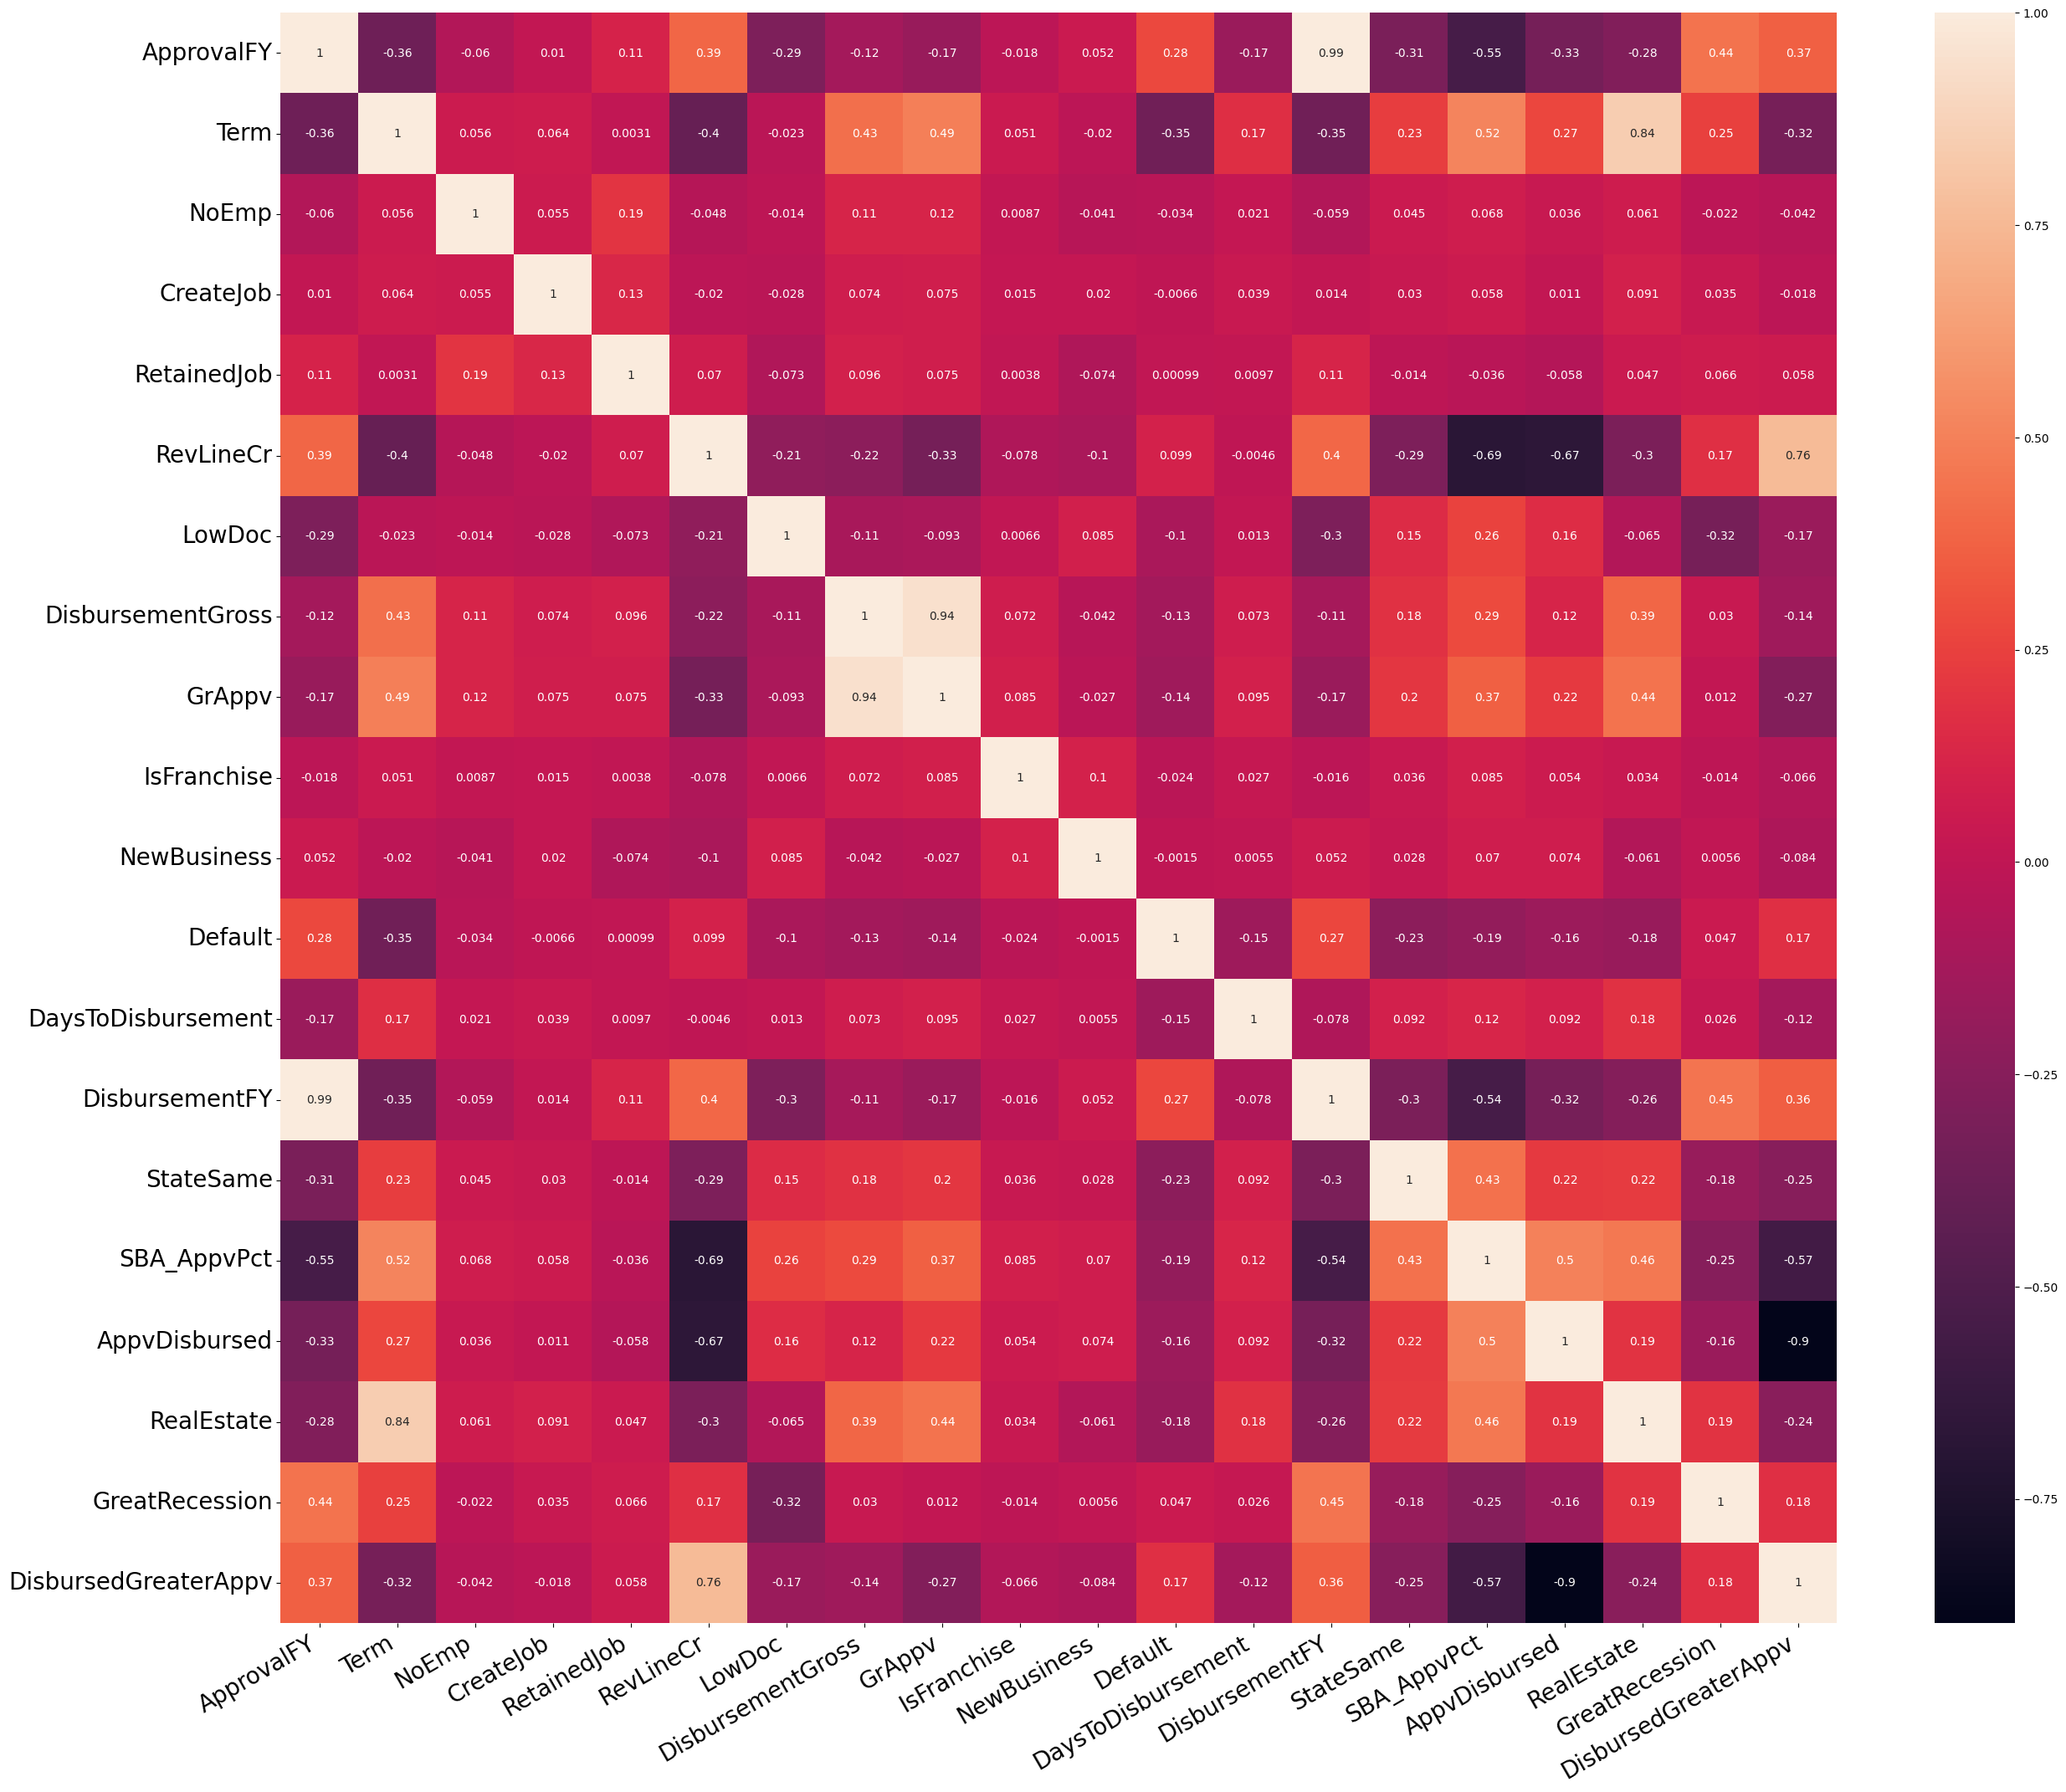

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Option 1: Exclude non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
corr_mtrx = df_numeric.corr()

# Plotting the correlation matrix
correlation_figure, correlation_axis = plt.subplots(figsize=(30, 25))
correlation_axis = sns.heatmap(corr_mtrx, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=20)
plt.yticks(fontsize=20)
plt.show()


    GrAppv & DisbursementGross: Positive
    DisbursedGreaterAppv & AppvDisbursed: Negative
    RevLineCr & DisbursedGreaterAppv: Positive
    DisbursementFY & ApprovalFY:  Positive
    And More

In [ ]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    print(f"Column: {col}")
    print(df[col].unique()[:5])  # Print the first 5 unique values to inspect


Column: State
['IN' 'CT' 'FL' 'NC' 'IL']
Column: BankState
['OH' 'IN' 'DE' 'AL' 'FL']
Column: UrbanRural
['0' '1' '2']
Column: Industry
['Retail_trade' 'Accom/Food_serv' 'Healthcare/Social_assist'
 'Manufacturing' 'Other_no_pub']


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['State'] = LabelEncoder().fit_transform(df['State'])
df['BankState'] = LabelEncoder().fit_transform(df['BankState'])
df['UrbanRural'] = LabelEncoder().fit_transform(df['UrbanRural'])
df['Industry'] = LabelEncoder().fit_transform(df['Industry'])


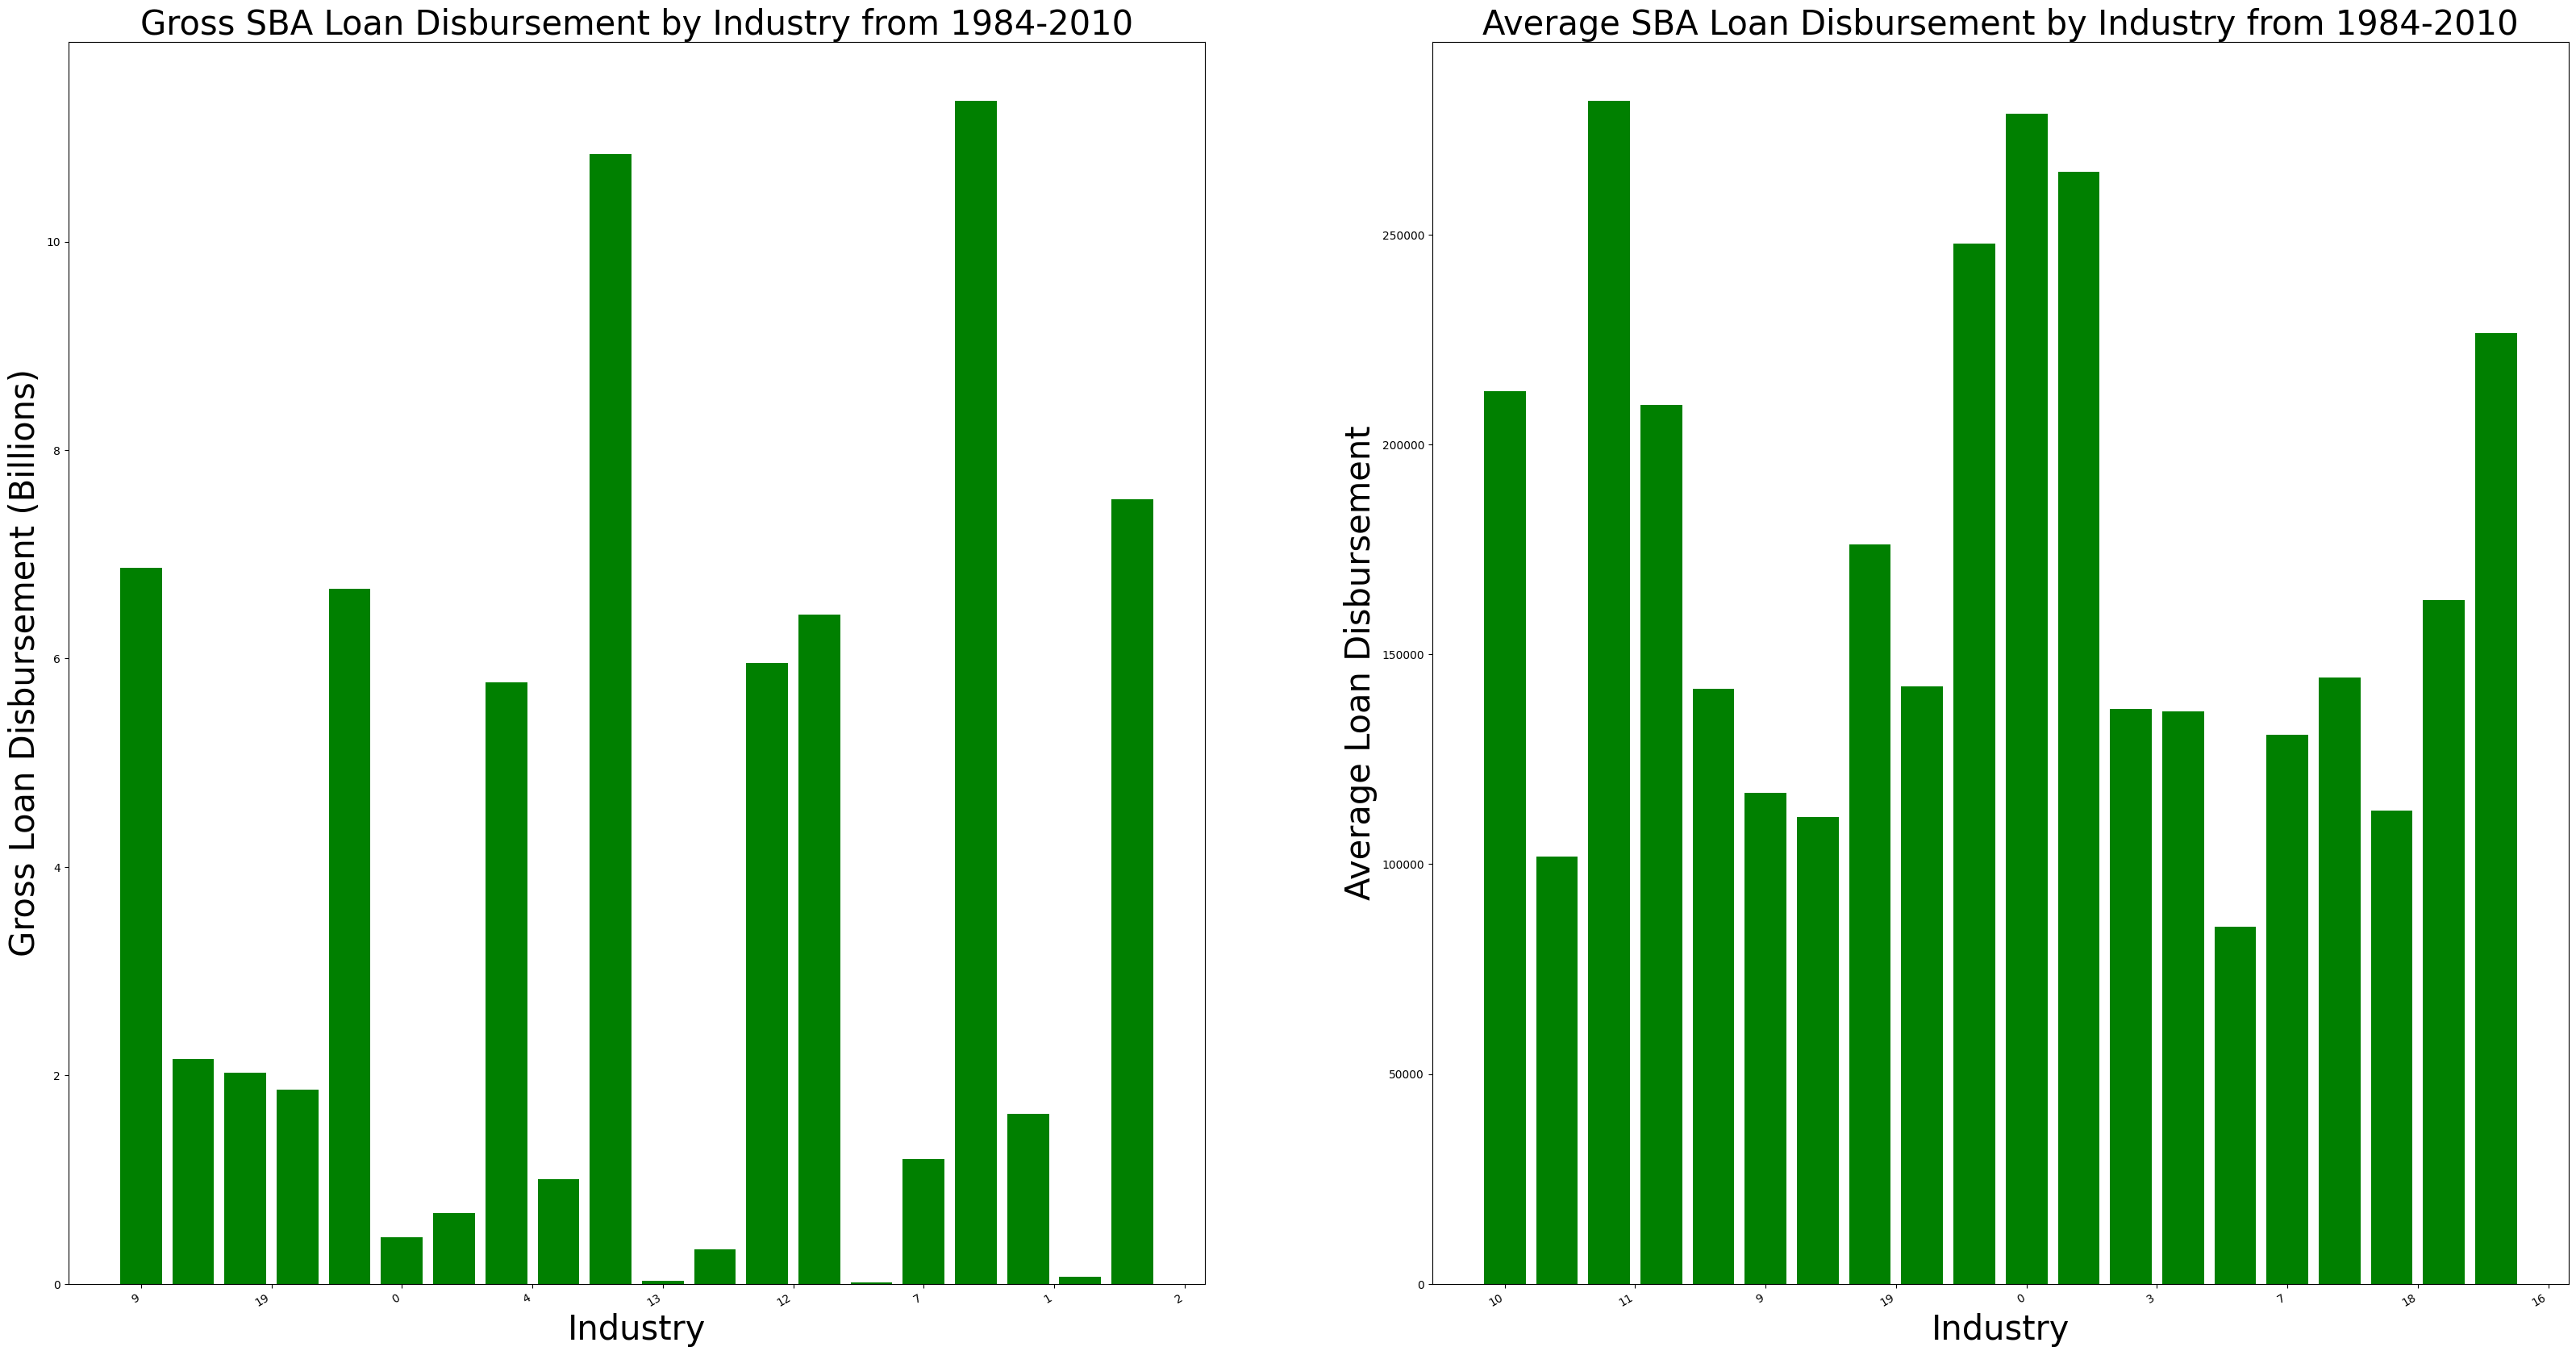

In [ ]:
industry_group = df.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Change bar color to green
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000, color='green')
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=30)
ax1.set_xlabel('Industry', fontsize = 30)
ax1.set_ylabel('Gross Loan Disbursement (Billions)', fontsize = 30)

# Change bar color to green
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'], color='green')
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=30)
ax2.set_xlabel('Industry',  fontsize = 30)
ax2.set_ylabel('Average Loan Disbursement',  fontsize = 30)

plt.show()


We notice, that Retail Trade and Manufacturing Industries have taken more loans than any other in this time period.

But Agriculture, Forestry, Fishing, Hunting, Mining and more have small number of loans taken, but the amount of loan taken in total is the most relative to the other industries.

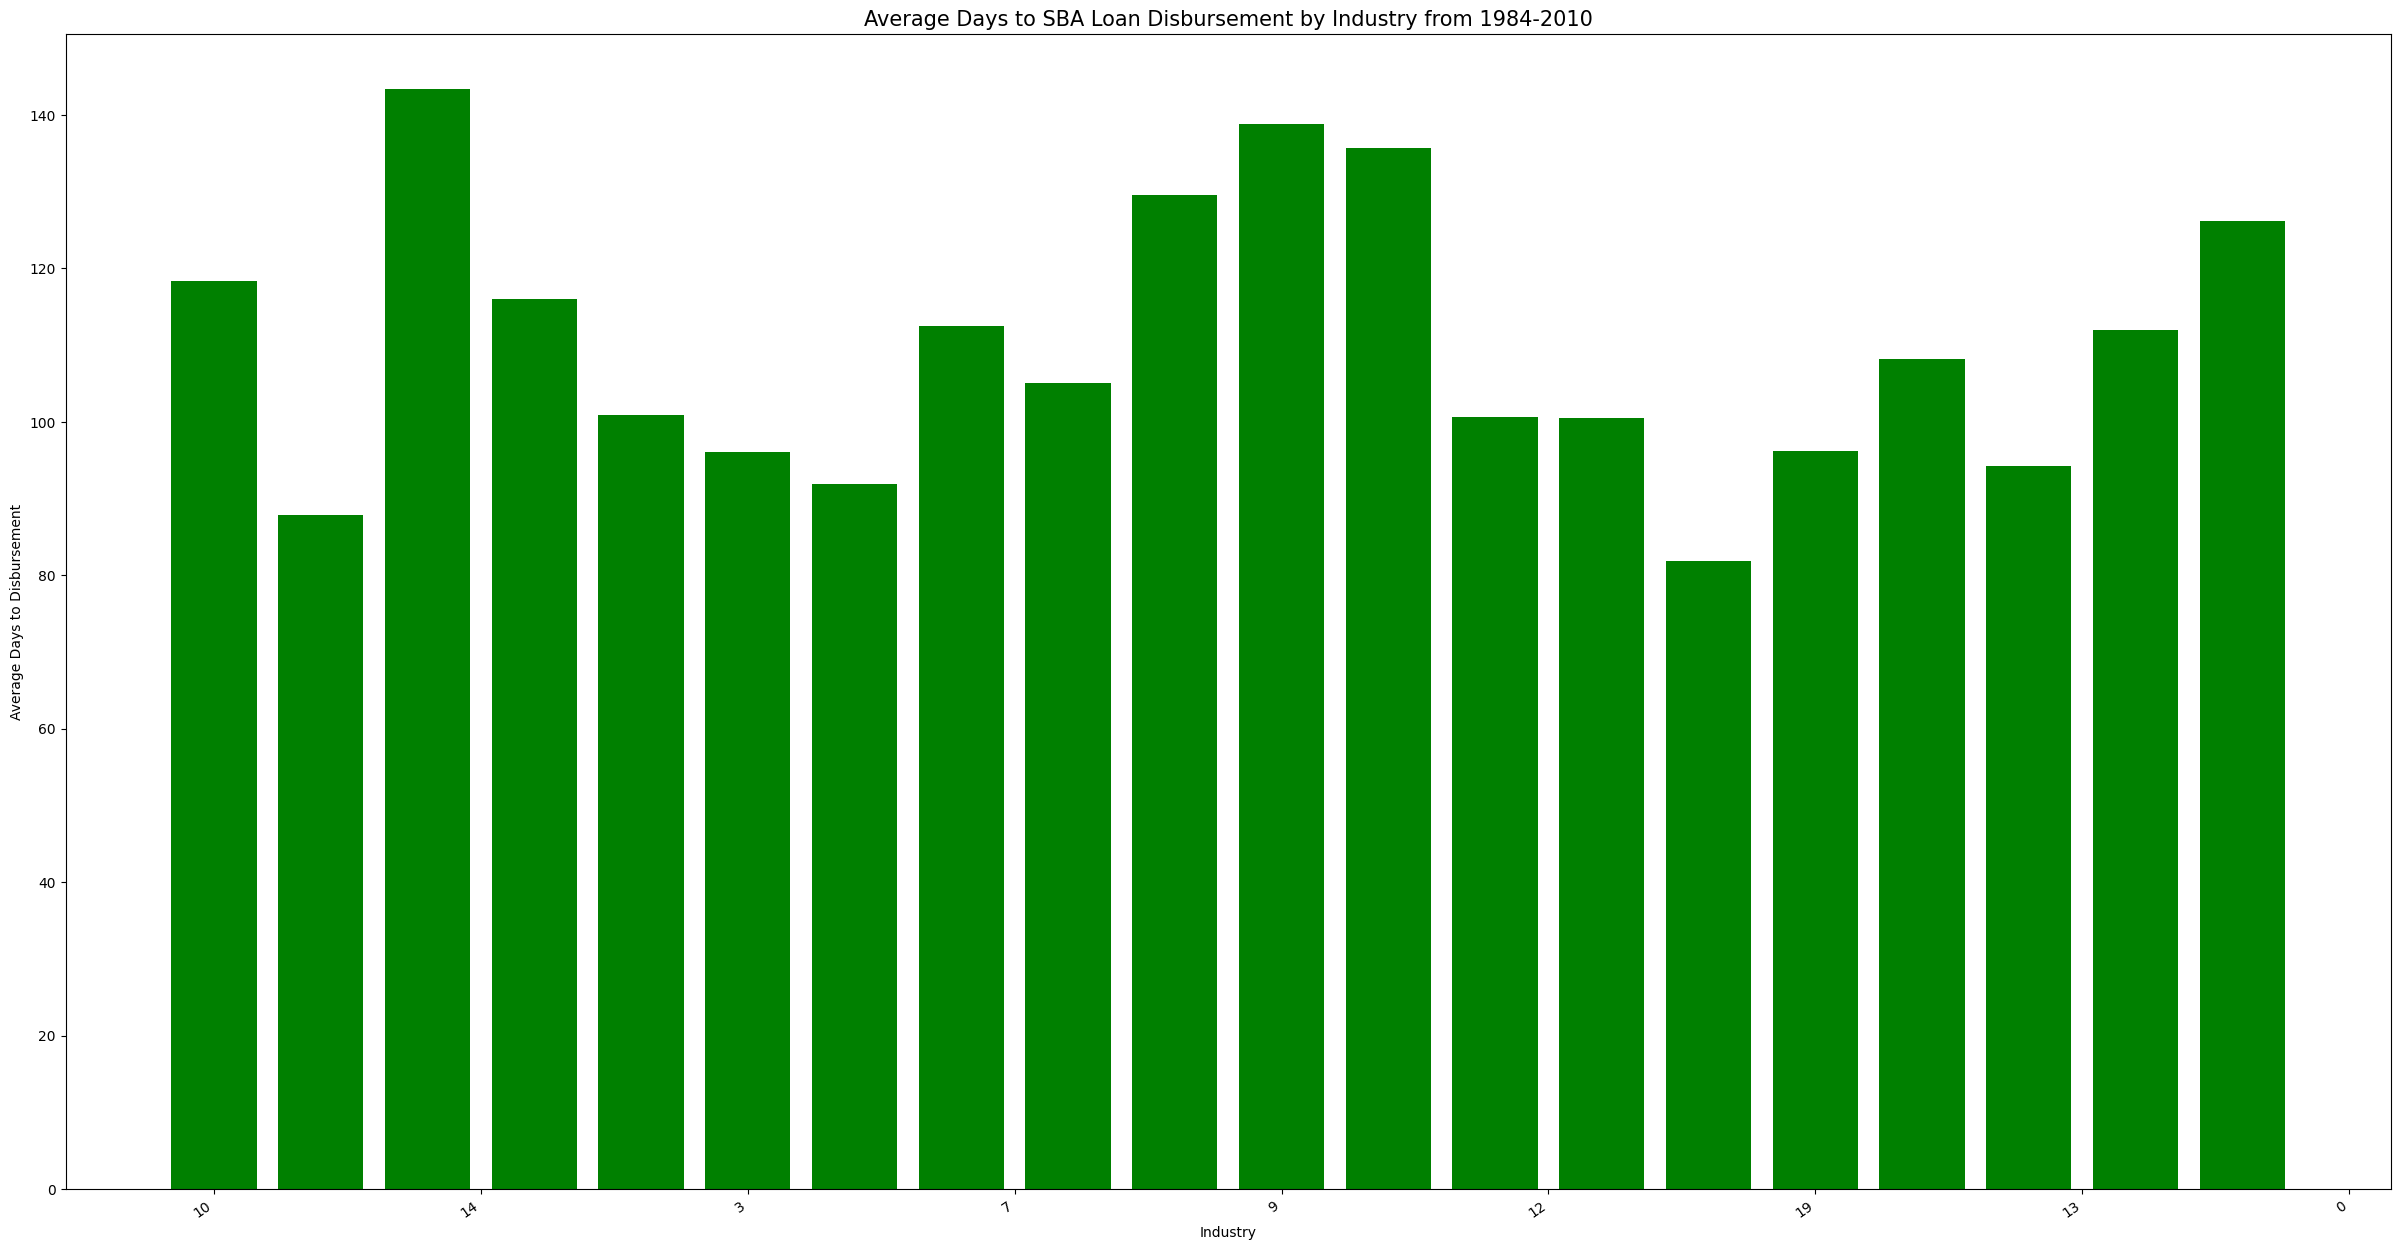

In [ ]:
fig2, ax = plt.subplots(figsize=(30,15))

# Change bar color to green
ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False), color='green')

ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()


Here, we notice that the industries with the highest avg loan amount also had the highest number of days to disbursement of funds.

Agri, Forestry, Fishing, Hunting ..

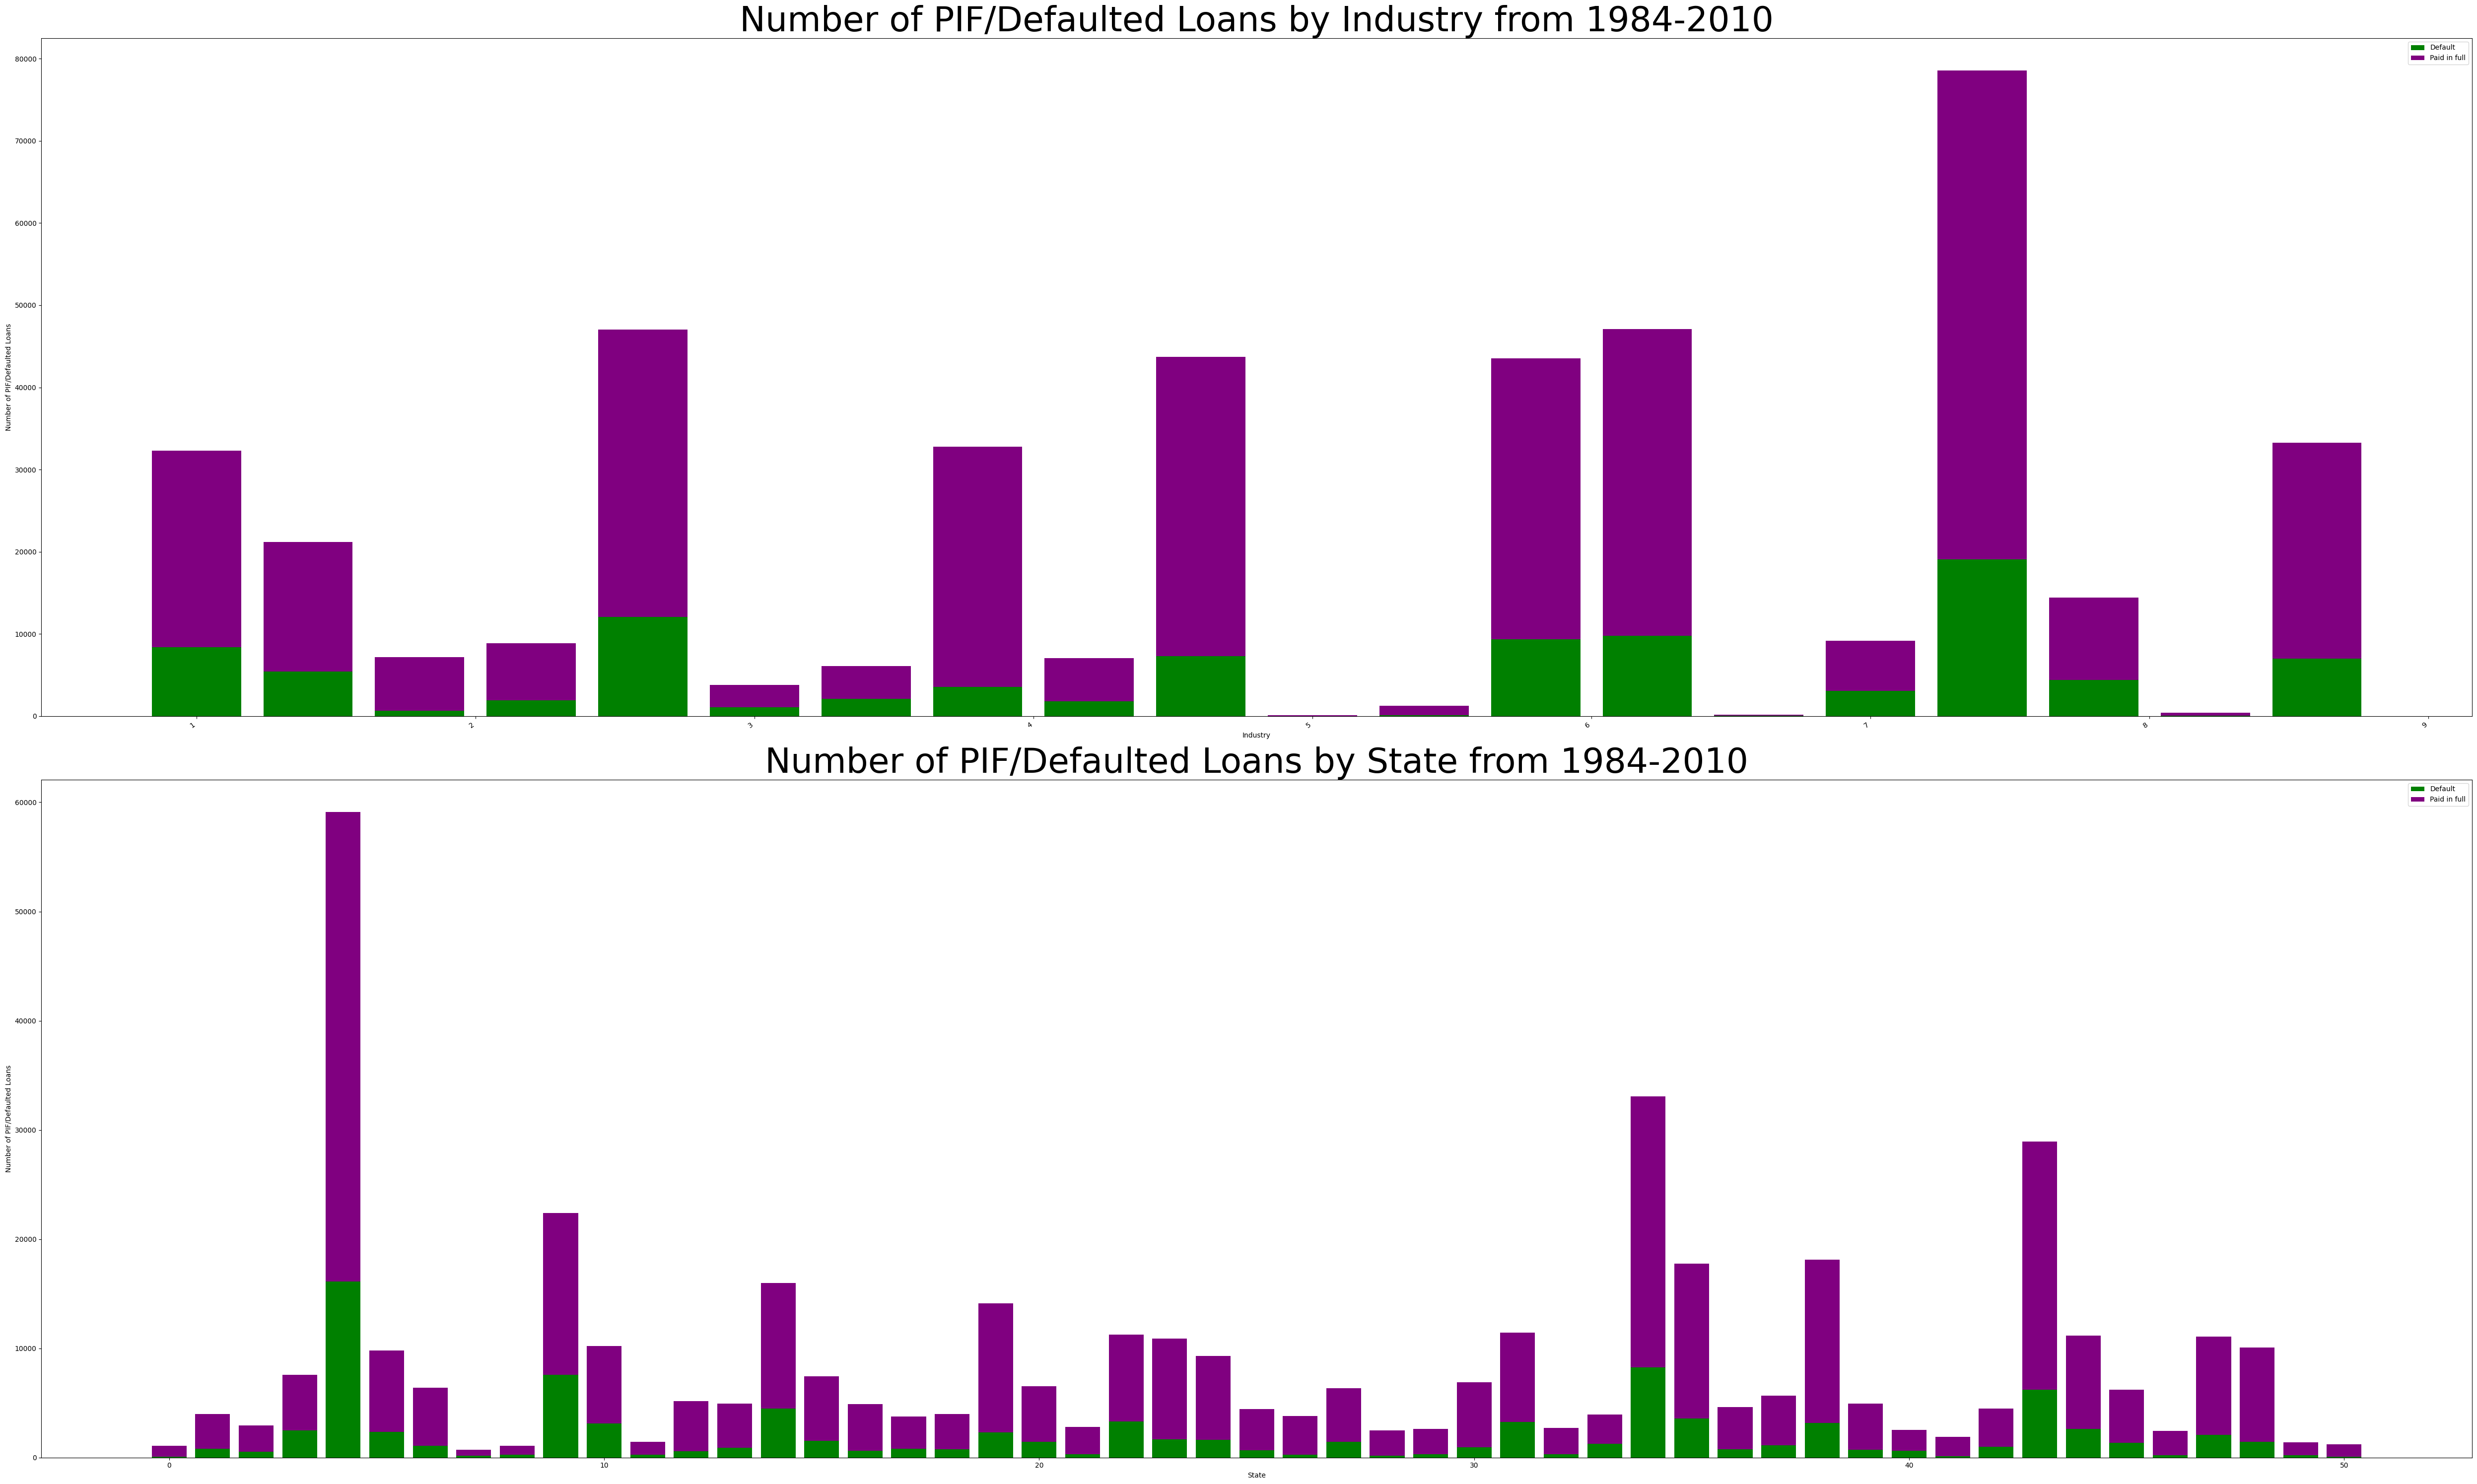

In [ ]:
fig3 = plt.figure(figsize=(50, 30))

ax1a = plt.subplot(2,1,1)
ax2a = plt.subplot(2,1,2)

def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Change the color of the first bar to green and the second bar to purple
    axes.bar(data.index, data[1], label='Default', color='green')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full', color='purple')

# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=50)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize= 50)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()


In [ ]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])

def_ind

Default,0,1,Def_Percent
Industry,,,
0,23936,8381,0.259337
1,15774,5427,0.255978
2,6536,657,0.091339
3,6976,1917,0.215563
4,34999,12048,0.256084
5,2750,1070,0.280105
6,3984,2093,0.344413
7,29192,3571,0.108995
8,5222,1830,0.259501


In [ ]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])

def_state

Default,0,1,Def_Percent
State,,,
0,979,94,0.087605
1,3192,805,0.201401
2,2414,528,0.179470
3,5119,2473,0.325738
4,42983,16138,0.272966
5,7439,2349,0.239988
6,5328,1064,0.166458
7,567,157,0.216851
8,841,246,0.226311


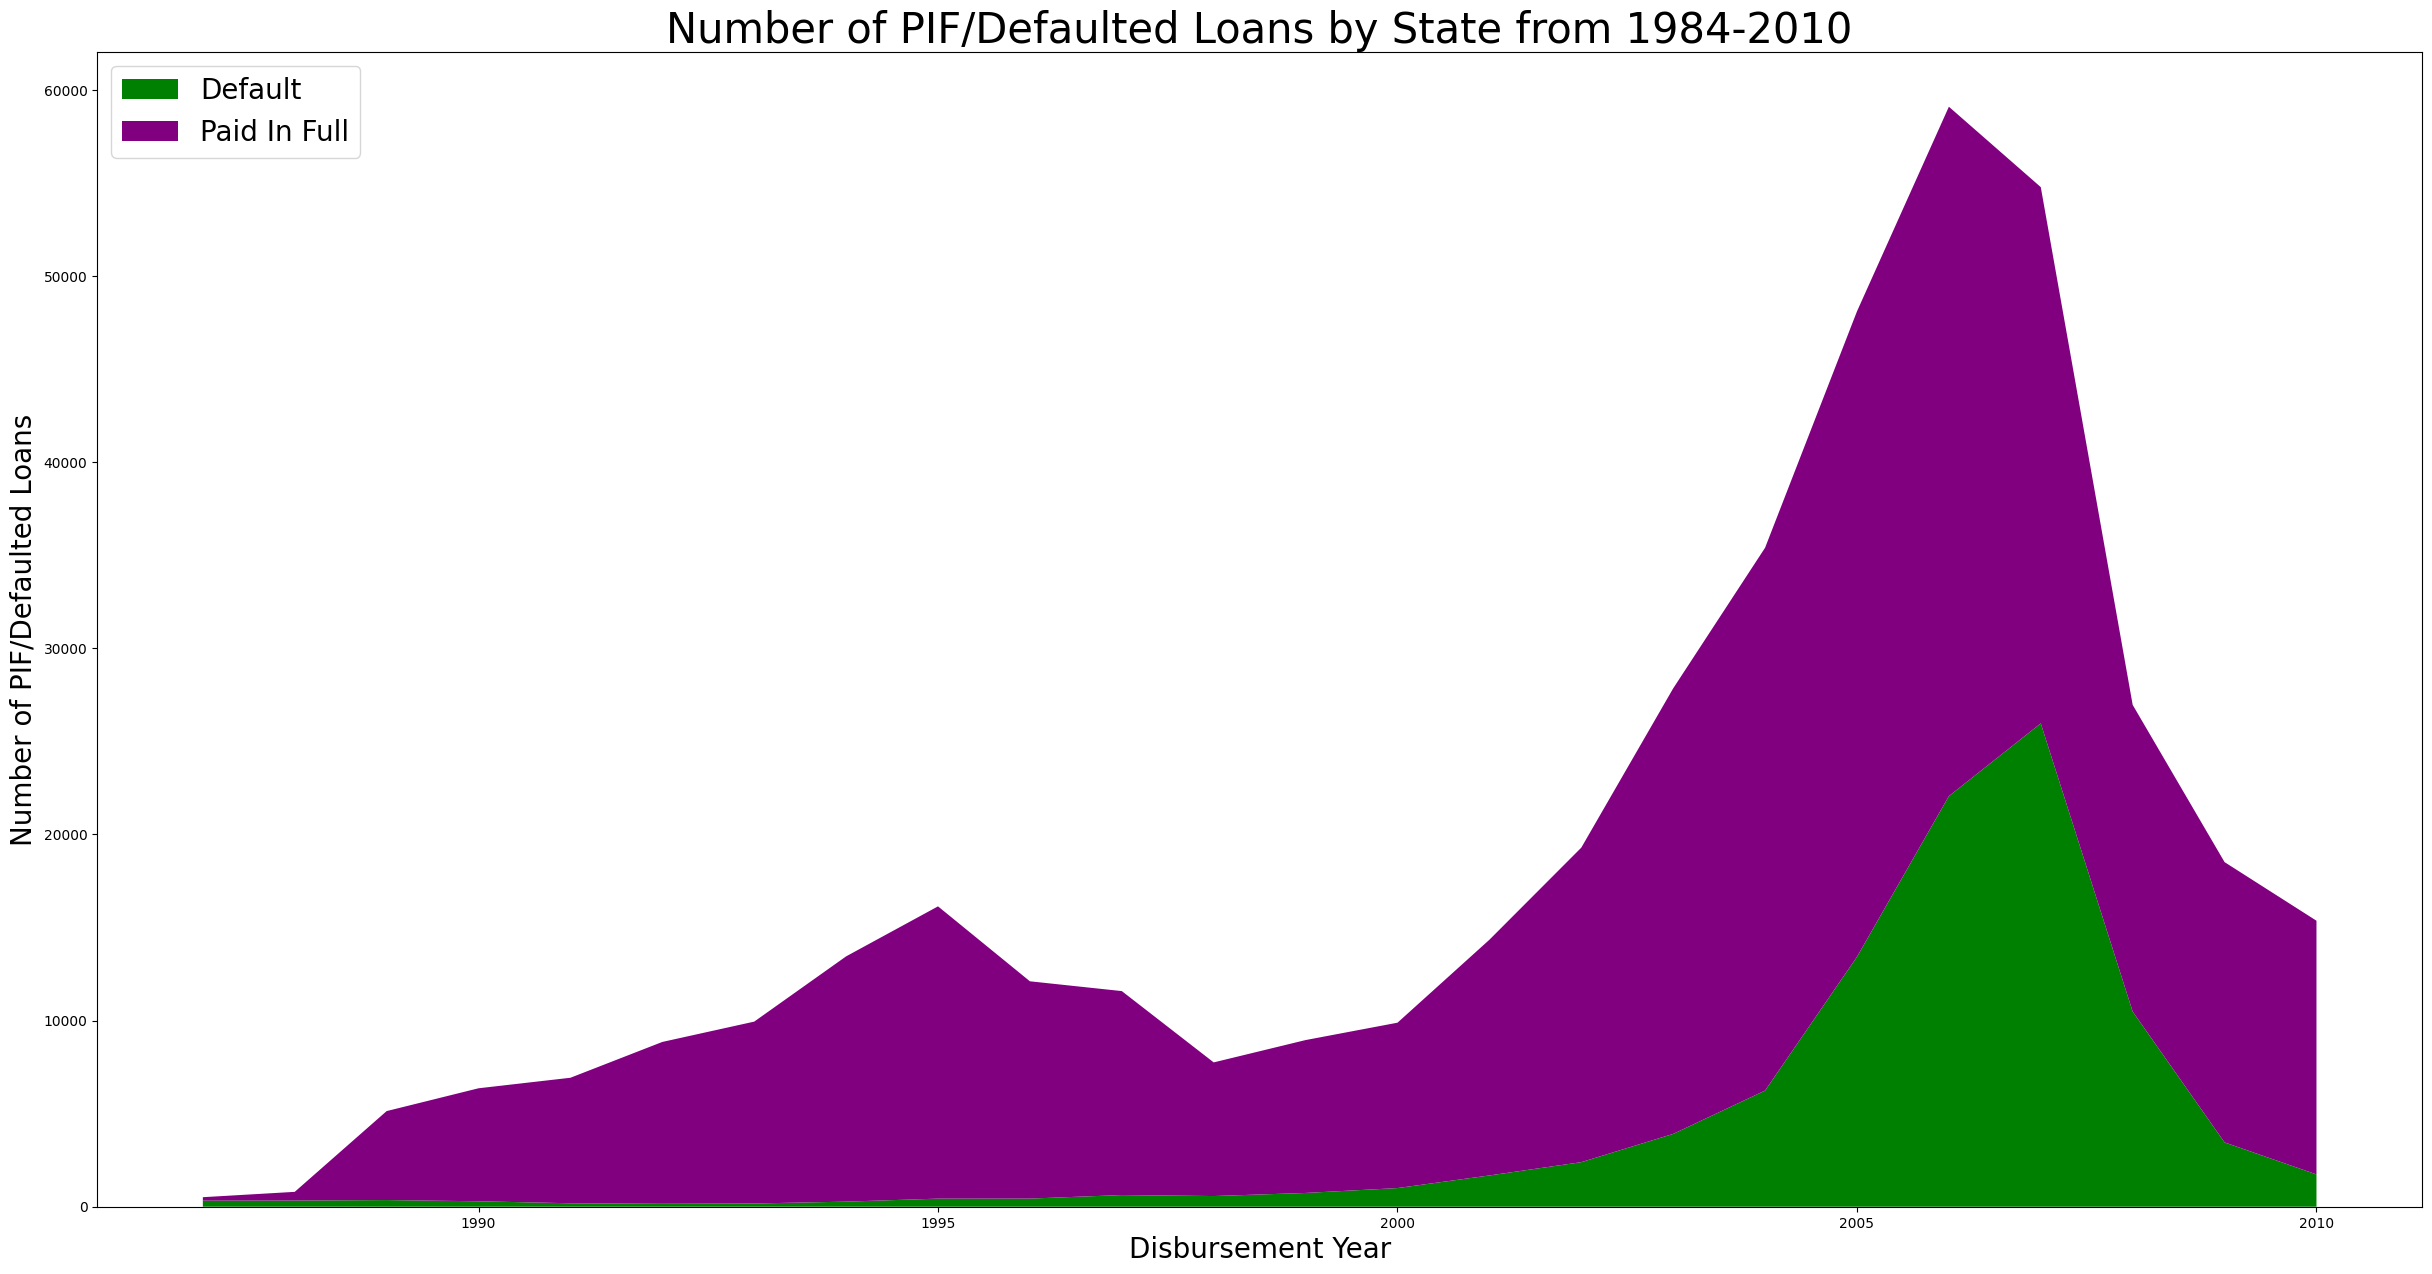

In [ ]:
import matplotlib.pyplot as plt

# Your code to generate the data goes here

fig4, ax4 = plt.subplots(figsize=(30, 15))

stack_data = df.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')

x = stack_data.index
y = [stack_data[1], stack_data[0]]

# Change the colors: blue to green, orange to purple
ax4.stackplot(x, y, labels=['Default', 'Paid In Full'], colors=['green', 'purple'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=30)

ax4.set_xlabel('Disbursement Year', fontsize=20)
ax4.set_ylabel('Number of PIF/Defaulted Loans', fontsize=20)
ax4.legend(loc='upper left', fontsize=20)

plt.show()


## Model Training and Testing

Here, the plan is to one hot encode the dataframe, Normalise the dataframe by scaling it and spliting the dataset into training and testing dataframes, and train the model on the training dataset and test it on the testing and comparing the prediction and the testing target column using various metrics to find out the best possible model for the dataset.

The Classifier Models to be used are:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Naive Bayes
- Voting Classifier


In [ ]:
df = pd.get_dummies(df)

df.head()

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession,DisbursedGreaterAppv
0,15,36,1997,84,4,0,0,0,0,1,...,1,0,730,1999,0,0.80,1,0,0,0
1,15,16,1997,60,2,0,0,0,0,1,...,1,0,92,1997,1,0.80,1,0,0,0
2,15,16,1997,180,7,0,0,0,0,0,...,0,0,306,1997,1,0.75,1,0,1,0
5,6,8,1997,120,19,0,0,0,0,0,...,0,0,122,1997,0,0.75,1,0,1,0
7,9,1,1997,84,1,0,0,0,0,1,...,1,0,487,1998,0,0.80,1,0,0,0


In [ ]:
y = df['Default']
X = df.drop('Default', axis = 1)

In [ ]:
scale = StandardScaler()
X_scld = scale.fit_transform(X)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scld, y, test_size=0.25)

#### Logistic Regression

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
lr = LogisticRegression(random_state = 42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.883     0.947     0.914     85281
           1      0.751     0.560     0.642     24242

    accuracy                          0.862    109523
   macro avg      0.817     0.754     0.778    109523
weighted avg      0.854     0.862     0.854    109523



#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)
model_dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.955     0.951     0.953     85281
           1      0.831     0.842     0.837     24242

    accuracy                          0.927    109523
   macro avg      0.893     0.897     0.895    109523
weighted avg      0.928     0.927     0.927    109523



In [ ]:
print("Testing accuracy is:",accuracy_score(y_val, y_pred))

Testing accuracy is: 0.9272298969166294


#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
model_rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.958     0.978     0.968     85281
           1      0.917     0.848     0.881     24242

    accuracy                          0.949    109523
   macro avg      0.937     0.913     0.924    109523
weighted avg      0.949     0.949     0.949    109523



In [ ]:
print("Testing accuracy is:",accuracy_score(y_val, y_pred))

Testing accuracy is: 0.9492891903983638


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.937     0.469     0.625     85281
           1      0.322     0.889     0.473     24242

    accuracy                          0.562    109523
   macro avg      0.630     0.679     0.549    109523
weighted avg      0.801     0.562     0.592    109523



In [ ]:
print("Testing Accuracy is: ", accuracy_score(y_val, y_pred))

Testing Accuracy is:  0.561991545154899


This accuracy value might be because of the factor of co-dependancy of columns on each other.

#### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression()

pipe = VotingClassifier([('dtc', dtc),('rfc', rfc),('lr', lr)], weights = [4,5,1])

In [ ]:
pipe.fit(X_train, y_train)

VotingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                             ('rfc', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression())],
                 weights=[4, 5, 1])

In [ ]:
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.949     0.981     0.965     85281
           1      0.924     0.816     0.867     24242

    accuracy                          0.944    109523
   macro avg      0.937     0.898     0.916    109523
weighted avg      0.944     0.944     0.943    109523



In [ ]:
print("Testing Accuracy is: ", accuracy_score(y_val, y_pred))

Testing Accuracy is:  0.9443952411822174


In conclusion, we get the best result from the Random Forest Classifier with an accuracy score of 94.6 on the testing dataframe.

With this project, I got to learn about the Loan Approval Process for Small Business Administration (SBA), as well about the entire process from taking the loan to disbursement of it, based on the different sectors of business. Also understood the effect of Great Recession on the Disbursement of the loans during that period, and it's effect on taking loans.